In [ ]:
import pandas as pd
covid_data = pd.read_csv('data/owid-covid-data.csv', on_bad_lines='skip')

In [ ]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
df = covid_data
df = df[['date','new_cases']]
df.head()

,date,new_cases
0,2020-02-24,5.0
1,2020-02-25,0.0
2,2020-02-26,0.0
3,2020-02-27,0.0
4,2020-02-28,0.0


In [ ]:
df1 = df.groupby(['date']).sum()
df1.head()

,new_cases
date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0


In [ ]:
df1.index = pd.to_datetime(df1.index)
df1 = df1.sort_index()
df1.index.freq = 'D'

In [ ]:
df1.head()

,new_cases
date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0


In [ ]:
df1.tail()

,new_cases
date,
2022-11-22,246457.0
2022-11-23,332342.0
2022-11-24,220933.0
2022-11-25,262382.0
2022-11-26,251433.0


In [ ]:
n1 = pd.read_csv('data/N50-1.csv', on_bad_lines='skip')
n2 = pd.read_csv('data/N50-2.csv', on_bad_lines='skip')
n3 = pd.read_csv('data/N50-3.csv', on_bad_lines='skip')

In [ ]:
frames = [n1, n2, n3]
df2 = pd.concat(frames)

In [ ]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100.0
1,2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700.0
2,2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800.0
3,2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500.0
4,2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800.0


In [ ]:
df2.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
218,2022-11-21,18246.400391,18262.300781,18133.349609,18159.949219,18159.949219,213800.0
219,2022-11-22,18179.150391,18261.849609,18137.699219,18244.199219,18244.199219,177700.0
220,2022-11-23,18325.199219,18325.400391,18246.000000,18267.250000,18267.250000,178800.0
221,2022-11-24,18326.099609,18529.699219,18294.250000,18484.099609,18484.099609,204000.0
222,2022-11-25,18528.449219,18534.900391,18445.099609,18512.750000,18512.750000,205900.0


In [ ]:
df2 = df2.set_index('Date')

In [ ]:
df2.index = pd.to_datetime(df2.index)
df2 = df2.sort_index()

In [ ]:
idx = pd.date_range(df1.index.min(), df1.index.max())
df2 = df2.reindex(idx,fill_value=np.nan)

In [ ]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100.0
2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700.0
2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800.0
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.tail()

,Open,High,Low,Close,Adj Close,Volume
2022-11-22,18179.150391,18261.849609,18137.699219,18244.199219,18244.199219,177700.0
2022-11-23,18325.199219,18325.400391,18246.000000,18267.250000,18267.250000,178800.0
2022-11-24,18326.099609,18529.699219,18294.250000,18484.099609,18484.099609,204000.0
2022-11-25,18528.449219,18534.900391,18445.099609,18512.750000,18512.750000,205900.0
2022-11-26,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np
df1=df1.reindex(idx,fill_value=np.nan)

In [ ]:
len(df1)

1061

In [ ]:
len(df2)

1061

In [ ]:
df1 = df1.fillna(df1.mean())
df1.dtypes

new_cases    float64
dtype: object

In [ ]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100.0
2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700.0
2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800.0
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [ ]:
df2 = df2.fillna(method='ffill')
df1 = df1.fillna(method='ffill')

In [ ]:
df1.head()

,new_cases
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0


In [ ]:
df1.tail()

,new_cases
2022-11-22,246457.0
2022-11-23,332342.0
2022-11-24,220933.0
2022-11-25,262382.0
2022-11-26,251433.0


In [ ]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100.0
2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700.0
2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800.0
2020-01-04,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800.0
2020-01-05,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800.0


In [ ]:
df2.tail()

,Open,High,Low,Close,Adj Close,Volume
2022-11-22,18179.150391,18261.849609,18137.699219,18244.199219,18244.199219,177700.0
2022-11-23,18325.199219,18325.400391,18246.000000,18267.250000,18267.250000,178800.0
2022-11-24,18326.099609,18529.699219,18294.250000,18484.099609,18484.099609,204000.0
2022-11-25,18528.449219,18534.900391,18445.099609,18512.750000,18512.750000,205900.0
2022-11-26,18528.449219,18534.900391,18445.099609,18512.750000,18512.750000,205900.0


In [ ]:
df2 = df2[['Close']]

In [ ]:
df2.head()

,Close
2020-01-01,12182.500000
2020-01-02,12282.200195
2020-01-03,12226.650391
2020-01-04,12226.650391
2020-01-05,12226.650391


In [ ]:
df2.tail()

,Close
2022-11-22,18244.199219
2022-11-23,18267.250000
2022-11-24,18484.099609
2022-11-25,18512.750000
2022-11-26,18512.750000


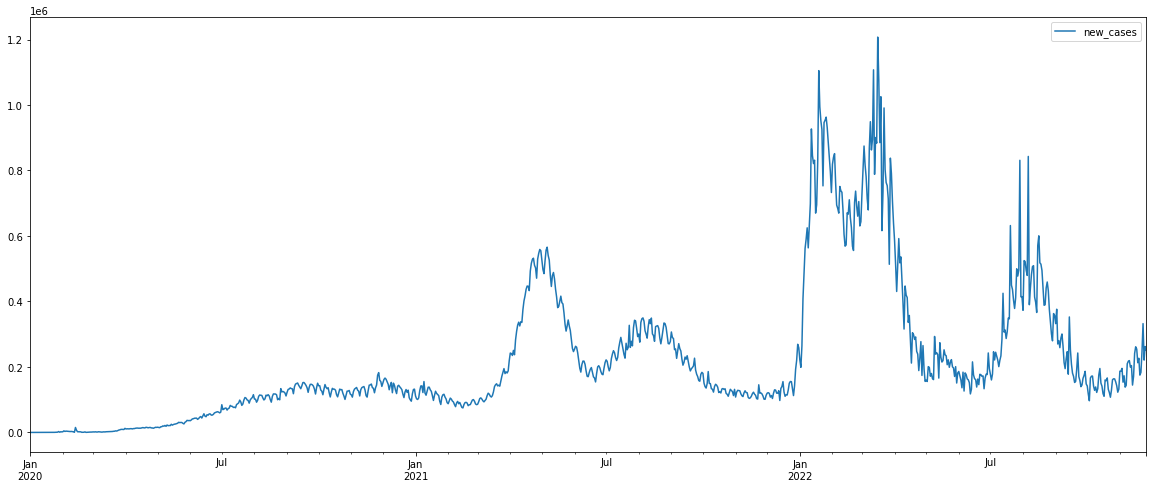

In [ ]:
dfp1 = df1
dfp2 = df2
df2.head()
# df1.head()
dfp1['new_cases'].plot(legend=True, label='new_cases', figsize=(20, 8))

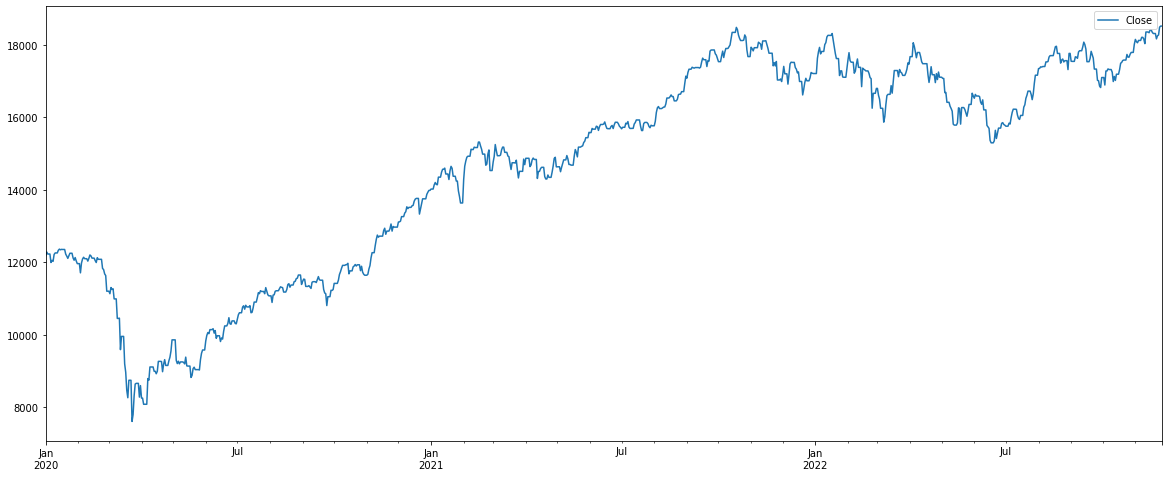

In [ ]:
dfp2['Close'].plot(legend=True, label='Close', figsize=(20, 8))

In [ ]:
dfp1['new_cases'].corr(dfp2['Close'])

0.5359324454190129

In [ ]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(df1['new_cases'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -3.124769
p-value: 0.024774
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [ ]:
result = adfuller(df2['Close'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -0.585536
p-value: 0.874217
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [ ]:
df1['new_cases'] = df1['new_cases'].diff()
df2['Close'] = df2['Close'].diff()

In [ ]:
df1 = df1.iloc[1:, :]

In [ ]:
df1.head()

,new_cases
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0
2020-01-06,0.0


In [ ]:
df2 = df2.iloc[1:, :]
df2.head()

,Close
2020-01-02,99.700195
2020-01-03,-55.549804
2020-01-04,0.000000
2020-01-05,0.000000
2020-01-06,-233.600586


In [ ]:
result = adfuller(df1['new_cases'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -6.411760
p-value: 0.000000
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [ ]:
result = adfuller(df2['Close'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -10.870036
p-value: 0.000000
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
df1['Close'] = df2['Close']
grangercausalitytests(df1[['new_cases', 'Close']], maxlag=[60])


Granger Causality
number of lags (no zero) 60
ssr based F test:         F=1.3373  , p=0.0484  , df_denom=879, df_num=60
ssr based chi2 test:   chi2=91.2838 , p=0.0057  , df=60
likelihood ratio test: chi2=87.3548 , p=0.0121  , df=60
parameter F test:         F=1.3373  , p=0.0484  , df_denom=879, df_num=60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


{60: ({'ssr_ftest': (1.337307525135608, 0.04842698422112161, 879.0, 60),
   'ssr_chi2test': (91.2837901116456, 0.005708581218601737, 60),
   'lrtest': (87.35479228485201, 0.01211090100324586, 60),
   'params_ftest': (1.3373075251356044, 0.04842698422112273, 879.0, 60.0)},
   array([[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 1., 0., 0.],
          [0., 0., 0., ..., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(df1[['Close', 'new_cases']], maxlag=[90])


Granger Causality
number of lags (no zero) 90
ssr based F test:         F=1.2605  , p=0.0597  , df_denom=789, df_num=90
ssr based chi2 test:   chi2=139.4732, p=0.0006  , df=90
likelihood ratio test: chi2=130.3142, p=0.0035  , df=90
parameter F test:         F=1.2605  , p=0.0597  , df_denom=789, df_num=90


{90: ({'ssr_ftest': (1.260531092095371, 0.05966244528953805, 789.0, 90),
   'ssr_chi2test': (139.4732120911608, 0.0006464618256088805, 90),
   'lrtest': (130.31419066310082, 0.0035283668031222833, 90),
   'params_ftest': (1.2605310920953123, 0.05966244528957392, 789.0, 90.0)},
   array([[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 1., 0., 0.],
          [0., 0., 0., ..., 0., 1., 0.]])])}